<a href="https://colab.research.google.com/github/Vany2002/Methods_And_Algorithms_Of_Digital_Image_Processing/blob/main/5_1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с изображениями на языке Python. Библиотеки языка Python, используемые для обработки данных ДЗЗ.

# Раздел 1. Введение










На этом этом практическом занятии Вы познакомитесь с обработкой, визуализацией и анализом геопространственных данных в браузере с помощью высокоуровневых географических библиотек Python и Google Сolaboratory.

Практическое занятие состоит из 4 разделов: "Введение", "Работа с векторными данными в библиотеке Geopandas", "Работа с растровыми данными в библиотеке Rasterio" и "Визуализация геоданных":  



* В первом разделе мы рассмотрим, как использовать Google Colab и установить необходимые библиотеки Python.

* Во втором разделе мы научимся обрабатывать геопространственные данные с помощью библиотеки Geopandas. Мы выполним несколько наиболее часто используемых ГИС-задач без использования программ для настольных ГИС. Среди этих задач - загрузка пространственных данных, работа с геоданными, проекциями и системами координат, а также выполнение пространственных соединений, наложения и буферного анализа.

* В третьем разделе будут рассмотрены, прежде всего, некоторые полезные функции обработки растровых данных. Основной библиотекой, используемой в этом разделе, будет RasterIO, очень удобный инструмент для растрового анализа.

* Четвертый раздел посвящен, прежде всего, визуализации географических данных и картографии на Python. Здесь мы будем создавать как статические, так и интерактивные карты с помощью Geopandas, Plotly Express и библиотеки Folium.



### 1.2 Установка и данные

Геопространственные библиотеки не установлены в google colab как стандартные библиотеки python, поэтому для их использования нам необходимо их установить. Для этого можно воспользоваться командами !apt install или !pip install.

Вот список библиотек, которые нам нужно установить:

1.   Gdal
2.   Geopandas
3.   Rasterio
4.   Folium

Установка может занять от 1 до 3 минут.

In [2]:
%%time
!apt update
!apt upgrade
# Библиотека, необходимая для работы других библиотек
!apt install gdal-bin python-gdal python3-gdal
# Установка rtree - требование Geopandas
!apt install python3-rtree
# Установка Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Установка descartes - Geopandas requirment
!pip install descartes
# Установка rasterio for raster data
!pip install rasterio
# Установка Folium для визуализации геоданных
!pip install folium
# распаковка набора данных
!apt-get install xz-utils
# Установка pysal для составления тематических карт в Geopandas
!pip install pysal

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,303 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,550 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates

Импортируем набор данных в наше временное хранилище виртуальной среды Colab:

In [3]:
!git clone --recursive https://github.com/tester170/DPO_Geo.git

Cloning into 'DPO_Geo'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 19.99 MiB | 21.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Данные импортированы. Если вы посмотрите на имеющиеся во временном хранилище файлы (левое меню - Файлы, иконка папки), то увидите две папки: папку sample data, в которой находятся датасеты из Google Colab, и папку DPO_Geo.

Посмотрим содержимое папки DPO_Geo:

In [4]:
!ls DPO_Geo/

DATA.tar.xz  README.md


Данные сжаты, и перед использованием их необходимо распаковать:

In [5]:
!tar -xf DPO_Geo/DATA.tar.xz

Посмотрим содержимое папки с распакованными файлами:

In [6]:
!ls DATA

cities.geojson	      DeSO_region.gpkg-wal  GBGDEM_50m.tif.aux.xml  vastra.dbf	vastra.shp
DeSO_region.gpkg      GBGDEM_50m.tfw	    roads.geojson	    vastra.prj	vastra.shx
DeSO_region.gpkg-shm  GBGDEM_50m.tif	    vastra.cpg		    vastra.qpj


Теперь у нас есть все необходимые данные.

Далее импортируем библиотеки, которые мы будем использовать.

Вполне стандартно использовать сокращения (псевдонимы) вместо полного названия библиотеки. Например, Geopandas импортируется как gpd. Это делает ваш код более компактным, и вам не нужно постоянно вводить полное имя библиотеки каждый раз, когда вы хотите ее использовать.

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import folium
import glob

В Google Colab есть замечательная функция, позволяющая сворачивать код. Если прокрутить страницу вверх, то рядом с заголовком "Введение" можно будет заметить маленькую стрелку-треугольник. Нажмите ее, и весь приведенный выше код будет свернут, включая эту ячейку.


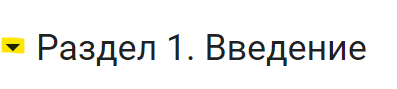

# Раздел 2. Работа с векторными данными в библиотеке Geopandas   

**Ссылка на техническую документацию Geopandas: https://geopandas.org/en/stable/**


*В этом разделе мы познакомимся с основами загрузки и обработки географических данных, в основном с помощью Geopandas:**

1. Для начала работы с Geopandas необходимо установить его и его зависимости. Это можно сделать с помощью менеджера пакетов Python, такого как pip. После установки Geopandas можно импортировать в свой проект и начать использовать его функциональность.

2. Для загрузки географических данных в Geopandas можно использовать различные источники, такие как файлы формата Shapefile, файлы формата GeoJSON, базы данных или непосредственно из веб-сервиса, такого как OpenStreetMap. Примеры кода для загрузки данных из этих источников доступны в [документации Geopandas](https://geopandas.org/en/stable/).

3. Одна из основных структур данных Geopandas - это GeodataFrame. Она является расширением Pandas DataFrame и содержит специальные столбцы, содержащие геометрическую информацию. Геометрическая информация представляется как объекты Shapely, которые могут содержать точки, линии, полигоны и другие геометрические сущности.

4. Операции манипуляции данными, доступные в Geopandas, включают сортировку, фильтрацию, группировку и слияние данных. Эти операции могут быть выполнены как на данных атрибутивной таблицы, так и на геометрических объектах. Также Geopandas предоставляет возможность проводить пространственные операции, такие как перекрытие, объединение, разделение и трансформация геометрических объектов.

5. Geopandas также обладает возможностью проекции географических данных. Она позволяет преобразовывать данные из одной системы координат в другую, что является важным для различных задач анализа и визуализации географических данных.

6. Визуализация географических данных в Geopandas осуществляется с помощью библиотеки Matplotlib. Метод plot() позволяет построить карты, графики и диаграммы на базе GeodataFrame/GeoSeries. Дополнительно можно настроить внешний вид карты, добавить легенду и масштаб, и сохранить результат в файл.

7. Geopandas также имеет возможность работать с временными данными. Это позволяет анализировать географические данные, учитывая их изменение с течением времени. Поддерживаемые операции со временем включают фильтрацию, группировку, агрегацию и визуализацию данных.

8. И, наконец, Geopandas интегрируется хорошо с другими библиотеками Python, такими как NumPy, SciPy, Rasterio и GDAL. Это позволяет использовать их функциональность в комбинации с Geopandas для выполнения более сложных задач геопространственного анализа и обработки данных.

> Это только обзор основных возможностей Geopandas. Для более глубокого понимания и использования всех функций и методов Geopandas рекомендуется прочитать документацию и изучить примеры кода.

### 2.1 Загрузка данных
Для загрузки географических данных в Geopandas можно использовать функцию **read_file()**, в качестве аргумента которой необходимо указать путь к файлу.

Geopandas может читать практически любой векторный формат пространственных данных, включая ESRI shapefile, GeoJSON и Geopackages.  


* Давайте еще раз посмотрим на наши данные:


In [8]:
# См. данные.
!ls DATA

cities.geojson	      DeSO_region.gpkg-wal  GBGDEM_50m.tif.aux.xml  vastra.dbf	vastra.shp
DeSO_region.gpkg      GBGDEM_50m.tfw	    roads.geojson	    vastra.prj	vastra.shx
DeSO_region.gpkg-shm  GBGDEM_50m.tif	    vastra.cpg		    vastra.qpj


#### 2.1.1. Чтение данных

Код, написанный ниже, используется для чтения гео-данных из файла формата GeoPackage (расширение .gpkg). В данном случае, файл с именем 'DeSO_region.gpkg' располагается в папке с именем 'DATA'.

Импортируется библиотека geopandas (сокращенно gpd), которая позволяет работать с геоданными, а также другие необходимые библиотеки, такие как pandas и numpy.

Далее, функция read_file() из библиотеки geopandas вызывается с аргументом 'DATA/DeSO_region.gpkg', что указывает на путь к файлу, который нужно прочитать. Прочитанные данные сохраняются в переменной regions.

Исходя из имени файла ('DeSO_region.gpkg'), можно предположить, что это данные о регионах или областях, связанных с неким проектом или задачей. Эти данные могут содержать информацию о границах регионов, атрибутах и других географических свойствах, которые можно использовать для анализа или визуализации.

In [9]:
# Открываем данные DeSO_region
regions = gpd.read_file('DATA/DeSO_region.gpkg')

In [10]:
# Теперь, когда мы считали данные, давайте посмотрим первые 5 строк.
regions.head()

,Deso,Bef_201612,geometry
0,0115A0040,1433,"MULTIPOLYGON (((690301.503 6614909.754, 690301..."
1,0136A0010,746,"MULTIPOLYGON (((688731.626 6547758.133, 686809..."
2,0188A0150,1216,"MULTIPOLYGON (((699545.557 6645614.544, 699264..."
3,0188A0130,1246,"MULTIPOLYGON (((744992.280 6636197.581, 737578..."
4,0188A0060,2071,"MULTIPOLYGON (((755220.730 6620631.909, 746128..."


Таблица состоит из трёх столбцов: Deso, Bef_201612 и geometry.

* Столбец Deso содержит идентификаторы объектов (код района). Каждый объект имеет уникальный код, например, 0115A0040.

* Столбец Bef_201612 содержит числовые значения,  характеризующие численность населения в районе.

* Столбец geometry содержит геометрические данные в формате MULTIPOLYGON. MULTIPOLYGON - это тип геометрии, который описывает многоугольники или наборы многоугольников. В данной таблице каждая геометрическая фигура представлена в виде мультиполигона, то есть набора полигонов.

* Каждая строка в таблице представляет собой отдельный объект. Например, первая строка описывает объект с идентификатором 0115A0040, который имеет геометрическое представление в виде мультиполигона.

> Таким образом, таблица содержит информацию об объектах, их идентификаторы, числовые показатели и геометрическое представление в виде мультиполигонов.






#### 2.1.2. Статистический анализ данных

Метод regions.**describe()** выполняет статистический анализ описательных характеристик набора данных regions.

Метод **describe()** вызывается на объекте DataFrame (наборе данных) regions. Он возвращает сводку статистических показателей для числовых колонок в наборе данных.

Подробнее, метод describe() возвращает следующие статистические показатели:

- count: количество непропущенных значений в каждой колонке
- mean: среднее значение для каждой колонки
- std: стандартное отклонение для каждой колонки
- min: минимальное значение для каждой колонки
- 25%: первый квартиль (25%), значение, которое делит набор данных на 25% наименьших значений
- 50%: второй квартиль (50%), значение, которое делит набор данных на две равные части
- 75%: третий квартиль (75%), значение, которое делит набор данных на 25% наибольших значений
- max: максимальное значение для каждой колонки

Эти статистические показатели позволяют оценить распределение данных в каждой колонке, идентифицировать наличие выбросов и определить характеристики данных.

In [11]:
# У нас есть три столбца. Deso - код района. Bef_201612 - численность населения в районе. Столбец geometry
#  (Объекты Geometry определяют пространственное положение и связанную с ним геометрическую форму.)
# Прежде чем что-то делать с данными, необходимо получить их описание, что легко сделать с помощью модуля describe().

regions.describe()

# Вы получаете представление о распределении данных, например, о максимальной и минимальной численности населения во всех регионах.

,Bef_201612
count,5985.000000
mean,1667.238429
std,407.551675
min,652.000000
25%,1377.000000
50%,1664.000000
75%,1953.000000
max,2691.000000


Параметр **shape** используется для получения информации о форме объекта. В данном случае, мы ожидаем, что объект regions имеет какие-то размеры или размерности.

* Возвращаемое значение параметра shape будет зависеть от типа объекта. Если объект является массивом или матрицей, то параметр вернет кортеж, в котором каждый элемент соответствует размерности массива.

* Например, если объект regions является двумерным массивом размера 3х4, то результатом вызова параметра shape будет (3, 4). Если же объект regions является одномерным массивом длины 5, то результатом будет (5,).

Результат может быть использован в дальнейшем коде для различных целей, например, для определения размеров, создания массивов или выполнения других операций.

In [12]:
# Выведем размерность нашего датафрейма, с помощью метода .shape()

regions.shape # У нас есть 5985 строк и 3 столбца

(5985, 3)

В строке ниже приведен код для отображения географической информации на карте:

Функция `regions.plot()` вызывает plot метод на объекте `regions`, который представляет географические данные.

Метод `plot()` позволяет создать графическое представление географических данных, например, карту с определенным стилем и параметрами.

Подробности визуализации зависят от используемых параметров и настроек в коде, которые определены до вызова `regions.plot()`. Например, можно задать стиль карты, цвета областей, представить границы регионов, добавить перекрестные ссылки, заголовок и т.д.

<Axes: >

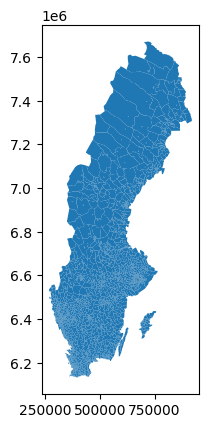

In [13]:
# И теперь, мы можем легко строить карты с помощью метода .plot()
regions.plot()

Код `regions.crs` используется для получения информации о координатной системе (CRS) объекта геоданных `regions` в библиотеке Geopandas.

CRS - это способ представления и описания пространственных данных, определяющий способ преобразования координат для отображения данных на земной поверхности. CRS может быть определена в разных форматах, таких как EPSG код (например, EPSG:4326) или WKT (Well-Known Text).

Вызов `regions.crs` возвращает текущую CRS, которая была назначена объекту `regions`. Она может быть представлена в формате EPSG кода или строковом формате WKT.

Примеры значений, которые могут быть возвращены `regions.crs`:

- EPSG код: "EPSG:4326" (координатная система WGS84)
- WKT формат: "PROJCS["World_Mollweide",GEOGCS["GCS_WGS_1984",DATUM["WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0]]"

Использование `regions.crs` полезно, чтобы узнать, какая CRS была назначена геоданным, так как множество операций, таких как преобразование координат, визуализация и анализ данных, требуют правильного CRS для правильной интерпретации географического контекста и представления данных.

In [14]:
# Для вывода информации об используемой системе координат, выведем значение параметра .crs
regions.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Задание 2.1

1.   Прочитайте файл cities.geojson с помощью функции **read_file()**, которую мы использовали для считывания файла со списком регионов. Сохраните результат, возвращаемый этой функцией в переменную *cities*.
2.   Выведите на экран первые 5 строк  **.head()**.
3.   Получите анализ описательных характеристик набора данных **.describe**.
4.   Выведите количество строк и столбцов **.shape**
5.   Постройте карту городов **.plot**.
6.   Выведите данные о городах, обратившись к параметру **.crs**.



1.   Прочитайте файл cities.geojson с помощью функции **read_file()**, которую мы использовали для считывания файла со списком регионов. Сохраните результат, возвращаемый этой функцией в переменную *cities*.

In [16]:
# 1. Прочитайте файл cities.geojson с помощью функции read_file(), которую мы использовали для регионов. Назовите его cities

cities = gpd.read_file('DATA/cities.geojson')

2.   Выведите на экран первые 5 строк объекта cities **(.head())**.

In [17]:
cities.head()

,osm_id,code,fclass,population,name,geometry
0,11094836,1002,town,29891,Nyköping,POINT (17.01181 58.75449)
1,15412058,1001,city,93838,Helsingborg,POINT (12.70407 56.04420)
2,20853389,1002,town,6497,Nykvarn,POINT (17.43124 59.17724)
3,20975576,1002,town,7418,Söderköping,POINT (16.32162 58.48238)
4,20975577,1002,town,2685,Valdemarsvik,POINT (16.60322 58.20259)


3.   Получите анализ описательных характеристик объекта cities **(.describe)**.

In [18]:
cities.describe()

,code,population
count,314.000000,314.000000
mean,1001.945860,21357.550955
std,0.299518,60315.219283
min,1001.000000,0.000000
25%,1002.000000,3887.500000
50%,1002.000000,8258.500000
75%,1002.000000,18592.500000
max,1005.000000,829417.000000


4.   Выведите количество строк и столбцов объекта cities **(.shape)**


In [19]:
cities.shape

(314, 6)

5.   Визуализируйте (постройте карту/график) объект cities (**.plot**)


<Axes: >

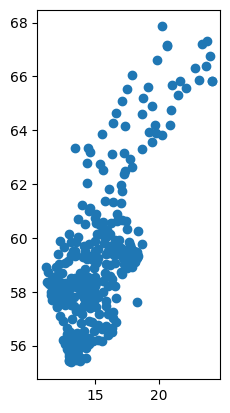

In [20]:
cities.plot()

6.   Выведите  информацию о координатной системе (CRS) объекта геоданных cities **(.crs)**.


In [21]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2.2 Географические системы координат (CRS)

Как видно, данные о городах и регионах имеют разные системы координат (СК). Поэтому в следующем подразделе мы рассмотрим референсные СК и проекции географических данных.

Фреймы геоданных имеют атрибут .crs, который позволяет получить исходные координаты, используемые в датафреймах. Эти координаты легко преобразовать и спроецировать.

Преобразуем датафрейм с городами в ту же СК, что и датафрейм с регионами - 'epsg:3006' Шведской системы координат. Перед этим посмотрим, что произойдет, если наложить города и регионы без перепроецирования.

Разбираться в коде визуализации сейчас не нужно (раздел "Визуализация геоданных" мы рассмотрим позже).

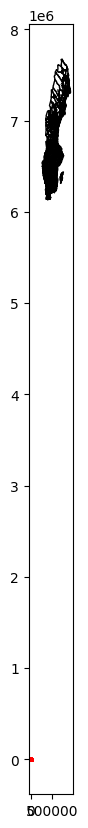

In [22]:
fig, ax  = plt.subplots(figsize=(14,10))
ax.set_aspect('equal')

regions.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker = '*', color='red', markersize=5)
plt.show()

**Видно, что области не совпадают.**

Для перепроецирования в Geopandas можно использовать метод **.to_crs()**, указав наименование проекции. В данном случае мы будем использовать 'epsg:3006'

Код для преобразования геометрий городов из одной проекции в другую, используя библиотеку geopandas, представлен в блоке ниже.

Подробное описание принципа его работы:

1. `cities` - это геодатафрейм, содержащий геометрии городов в определенной проекции.
2. `to_crs()` - это метод геодатафрейма geopandas, который преобразует геометрии в новую проекцию.
3. `{'init': 'epsg:3006'}` - это аргумент метода `to_crs()`, который задает новую проекцию в формате EPSG.
4. `'epsg:3006'` - это код EPSG, который представляет проекцию с координатной системой SWEREF99TM, используемой в Швеции.

Таким образом, данный код преобразует геометрии городов, содержащиеся в геодатафрейме `cities`, в проекцию SWEREF99TM, заданную EPSG кодом 3006. Результатом будет новый геодатафрейм `cities_proj`, содержащий геометрии городов в новой проекции.

In [23]:
cities_proj = cities.to_crs({'init': 'epsg:3006'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


* Теперь, когда мы изменили проекцию датафрейма с городами на 'EPSG:3006', всё выводится корректно.

* С этого момента следует помнить, что в дальнейшем мы будем использовать датафрейм **cities_proj**, вместо cities!

Визуализация:

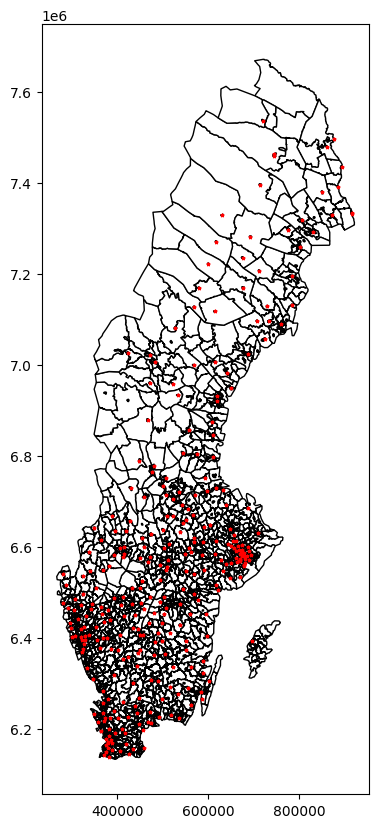

In [24]:
fig, ax  = plt.subplots(figsize=(14,10))
ax.set_aspect('equal')
regions.plot(ax=ax, color='white', edgecolor='black')
cities_proj.plot(ax=ax, marker = '*', color='red', markersize=5)
plt.show()

### 2.3 Пространственное объединение

 * В данных о городах нет региона, а в наших данных о регионах с небольшими областями есть не названия регионов, а небольшие коды областей (вероятно, избирательные участки, данные взяты из Статистического управления Швеции).

 * Далее нам необходимо сформировать выборку, состоящую только из городов, находящихся в определенных регионах (например, в регионе Vastra-Götland (Вастра-Гётланд)). Если бы у нас был уникальный атрибут, общий для этих двух наборов данных (cities_proj и regions), то мы могли бы использовать атрибутное объединение, но у нас его нет, поэтому нам нужно отдельно загрузить shp-файлы с набором данных для региона Vastra-Götland, после чего выполнить пространственное объединение.

> К этому времени Вы уже знаете, как загружать геоданные с помощью **.read_file()**  Откроем шейп-файл vastra.shp и выполним то же самое исследование данных, которое мы проводили для городов и регионов. Назовем его **vastra**.

In [25]:
vastra = gpd.read_file('DATA/vastra.shp')

In [26]:
vastra.head()

,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1,geometry
0,414,Kommun,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0,"POLYGON ((408887.450 6512813.931, 399589.973 6..."
1,414,Kommun,1427,Soten�s,14,V�stra G�talands l�n,1427,14,271235.0,6477930.0,0.0,0,0.0,"POLYGON ((294008.074 6486504.549, 293582.164 6..."
2,414,Kommun,1472,Tibro,14,V�stra G�talands l�n,1472,14,454587.0,6479200.0,0.0,0,0.0,"POLYGON ((461499.992 6491253.550, 461464.634 6..."
3,414,Kommun,1492,�m�l,14,V�stra G�talands l�n,1492,14,364344.0,6536910.0,0.0,0,0.0,"POLYGON ((378643.097 6521285.034, 378454.516 6..."
4,414,Kommun,1486,Str�mstad,14,V�stra G�talands l�n,1486,14,275764.0,6537670.0,0.0,0,0.0,"POLYGON ((295874.894 6533034.839, 295577.173 6..."


In [27]:
vastra.shape

(51, 14)

In [28]:
vastra.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

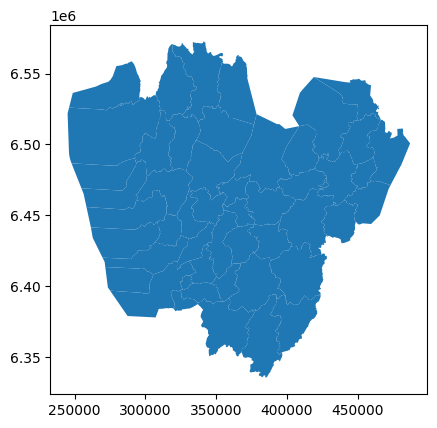

In [29]:
vastra.plot()

Мы загрузили регион Vastra-Götland и теперь можем получить все города этого региона в Geopandas с помощью функции **gpd.sjoin()**, предоставив два набора данных: в нашем случае города и регион.  

Также необходимо указать способ объединения: inner, left, right (внутренний, левый, правый) и операцию геообработки: within, intersection, contain (внутри, пересечение, содержание) и т.д..

Поскольку мы хотим получить все города, входящие в регион, мы сделаем это следующим образом:

1. `gpd.sjoin` является функцией, предоставляемой GeoPandas для выполнения пространственного соединения.

2. `cities_proj` и `vastra` - это два GeoDataFrame объекта, которые мы хотим соединить на основе их геометрического положения.

3. Параметры `how="inner"` и `op='within'` указывают, что мы хотим выполнить внутренее соединение, то есть вернуть только те города, которые находятся внутри географической области Вастра (Vastra). Оператор `within` используется для определения, находится ли один объект полностью внутри другого объекта.

4. Результирующий GeoDataFrame с названием `vastra_cities` будет содержать только те города, которые находятся внутри географической области Вастракарла (Vastra).

In [30]:
vastra_cities = gpd.sjoin(cities_proj, vastra, how="inner", op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-30-afd7e04bf4ee>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:3006 +type=crs
Right CRS: EPSG:3006

  vastra_cities = gpd.sjoin(cities_proj, vastra, how="inner", op='within')


In [31]:
vastra_cities.head()

,osm_id,code,fclass,population,name,geometry,index_right,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
6,21382663,1002,town,4928,Lilla Edet,POINT (330937.487 6447347.505),39,414,Kommun,1462,Lilla Edet,14,V�stra G�talands l�n,1462,14,331659.0,6447140.0,0.0,0,0.0
11,24970666,1002,town,8027,Tidaholm,POINT (438819.655 6449263.415),41,414,Kommun,1498,Tidaholm,14,V�stra G�talands l�n,1498,14,437889.0,6445560.0,0.0,0,0.0
13,25508588,1002,town,34466,Skövde,POINT (432438.212 6472694.463),24,414,Kommun,1496,Sk�vde,14,V�stra G�talands l�n,1496,14,436099.0,6476920.0,0.0,0,0.0
17,25710724,1002,town,3889,Vara,POINT (379927.452 6459575.461),13,414,Kommun,1470,Vara,14,V�stra G�talands l�n,1470,14,386131.0,6457600.0,0.0,0,0.0
24,25930131,1001,city,522259,Göteborg,POINT (319298.131 6400160.721),32,414,Kommun,1480,G�teborg,14,V�stra G�talands l�n,1480,14,307047.0,6395380.0,0.0,0,0.0


<Axes: >

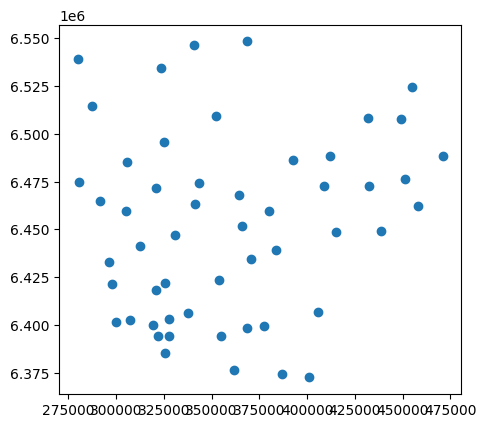

In [32]:
# Все города этого региона
vastra_cities.plot()

Для того чтобы дополнительно выяснить, входит ли конкретный город в состав региона, можно использовать запрос с параметром **contain**.

* Рассмотрим это на примере города Гетеборн. Вначале нам нужно обратиться к соответствующему столбцу, в данном случае это столбец: 'name', а затем использовать логический оператор эквивалентности (равенства): '=='. Если имя найдено в таблице, то будет возвращена его строка, если нет, то ничего не будет возвращено:

* Код в блоке ниже используется для фильтрации данных в географическом датафрейме с использованием библиотеки Geopandas.

* Переменная "vastra_cities" является географическим датафреймом, содержащим информацию о городах региона.

* Код фильтрует этот датафрейм, проверяя условие "name == 'Göteborg'". Здесь 'name' - это столбец в датафрейме, содержащий имена городов.

* В итоге, код выбирает все строки в датафрейме "vastra_cities", где значение столбца "name" равно 'Göteborg'. Результат сохраняется в переменной "gothenburg".

> Таким образом, "gothenburg" будет содержать отфильтрованный географический датафрейм с информацией только о городе Гётеборг.

In [33]:
gothenburg = vastra_cities[vastra_cities['name'] == 'Göteborg']
gothenburg

,osm_id,code,fclass,population,name,geometry,index_right,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
24,25930131,1001,city,522259,Göteborg,POINT (319298.131 6400160.721),32,414,Kommun,1480,G�teborg,14,V�stra G�talands l�n,1480,14,307047.0,6395380.0,0.0,0,0.0


#### Задание 2.2

Узнайте, является ли Borås городом в vastra_cities.

In [36]:
boras = vastra_cities[vastra_cities['name'] == 'Borås']
boras

,osm_id,code,fclass,population,name,geometry,index_right,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
301,1643360977,1002,town,66273,Borås,POINT (377345.142 6399522.094),27,414,Kommun,1490,Bor�s,14,V�stra G�talands l�n,1490,14,377396.0,6400750.0,0.0,0,0.0


В Geopandas доступно множество операций геообработки, и прежде чем перейти к работе с растровыми данными с помощью библиотеки Rasterio, мы научимся делать буферизацию. Допустим, нам нужно получить буфер 100 или 500 метров вокруг города Гетеборга. Для этого вызвовем метод .buffer() и получим буфер вокруг точки:

<Axes: >

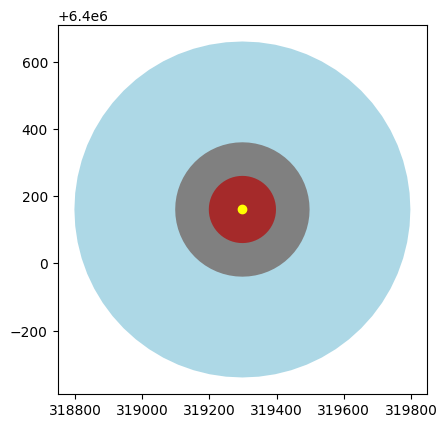

In [37]:
# Создадим буфер 500, 200, 100 метров и построим их график
goth_100 = gothenburg.buffer(100)
goth_200 = gothenburg.buffer(200)
goth_500 = gothenburg.buffer(500)
fig, ax = plt.subplots()
#vastra.plot(ax=ax)
goth_500.plot(ax=ax, color='lightblue')
goth_200.plot(ax=ax, color='gray')
goth_100.plot(ax=ax, color='brown')
gothenburg.plot(ax=ax, color='Yellow')


#### Задание 2.3
Создайте буфер вокруг города Borås (Борос), укажите желаемый размер:

<Axes: >

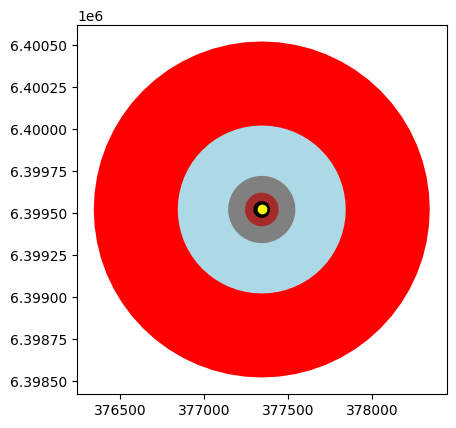

In [40]:
goth_50 = boras.buffer(50)
goth_100 = boras.buffer(100)
goth_200 = boras.buffer(200)
goth_500 = boras.buffer(500)
goth_1000 = boras.buffer(1000)
fig, ax = plt.subplots()
#vastra.plot(ax=ax)
goth_1000.plot(ax=ax, color='red')
goth_500.plot(ax=ax, color='lightblue')
goth_200.plot(ax=ax, color='gray')
goth_100.plot(ax=ax, color='brown')
goth_50.plot(ax=ax, color='black')
boras.plot(ax=ax, color='Yellow')